# Section 1: Getting Started with Machine Learning

In this section, let's try to model couple of simple functions from data to get started. Following examples are covered during this section

    1) Linear Regression

    2) Logistic Regression

    3) Linear Regression - Multiple Input Variables

    4) PCA - Principle Component Analysis

<hr><hr><hr>

In [1]:
'''first, let's import libraries '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, decomposition

## 1) Linear Regression

Basically Machine Learning can be considered as getting meaning out of data by modeling data. So simplest way is to build a model relating 2 variables by a linear equation. Then we can use this linear equation to predict output for any input value.

So in this section, let's try to build that simplest model relating 2 variables linearly.

First let's make 2 variables with arbitrary values which has kind of an incremental pattern like a line.

In [2]:
xx = np.array([0,1,2,3,4,5])
yy = np.array([5,8,8,12,14,13])

Now let's plot our data points as a scatter plot.

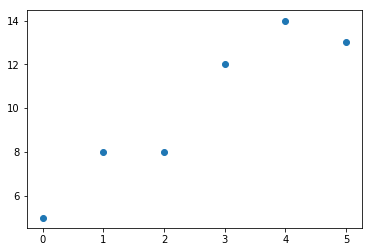

In [3]:
plt.scatter(xx, yy)
plt.show()

Now the goal is to build a model (equation) that predict __*yy*__ values from __*xx*__ values. And we want to find the best model (with minimum error) to do that. There are little complicated mathematics about finding the best model. But in all examples in these tutorials and in lots of practical applications, we will use Python libraries such as Sklearn, Tensorflow that include all those complicated mathematical calculations.

So next, we will do these steps,

    1) Prepare data

    2) Define the model

    3) Fit the model

    4) Prediction and Validation

In [4]:
'''1) Prepare Data'''
# Sklearn library require xx data to be in this shape, (number of data points, number of variables)
# yy data to be in this shape, (number of data points)

xx = np.reshape(xx, (6,1)) 
yy = yy

'''2) Define the Linear Model from sklearn library'''
model = linear_model.LinearRegression()

'''3) Fit the model using fit function'''
model.fit(xx, yy)

# And now we can print the model (equation of a line) with the model parameters 
print('Y = '+str(model.coef_[0])+ '   X   +   '+ '   ' + str(model.intercept_))

Y = 1.771428571428572   X   +      5.57142857142857


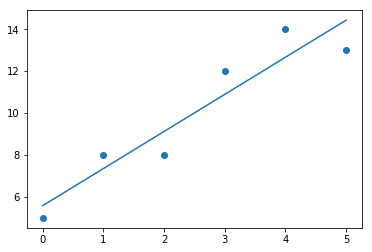

In [5]:
'''4) Prediction and Validation'''

## Prediction from the model using "predict" function
yy_pred = model.predict(xx)

# And let's plot ground truth data as a scatter plot and modeled equation as a line
plt.scatter(xx, yy)
plt.plot(xx, yy_pred)
plt.show()

So this is a one way to visually validate our model against actual ground truth data. And there are other ways of doing it too, like calculating errors like Root Mean Squared Error (RMSE).

*Exercise: Write a function to calculation Root Mean Squared Error (RMSE) and calculate RMSE for above model prediction*

Finally, we can use this model to calculate __*yy*__ values for new __*xx*__ values. First we have to reshape input to have shape of (number of data points, number of variables). In this case shape is (1,1). And then we can predict, __*yy*__ value corresponding to __*xx = 2.5*__ value

In [6]:
print(model.predict(np.reshape(2.5,(1,1)))) 

[10.]


## 2) Logistic Regression

Now, let's move in to a little sophisticated model with little complicated function. In this examples, let's try to model, __*S Curve*__ shape function, going beyond linear shape. These functions are called as Logistic Functions.

And the equation for Logistic Function is as follows. __*xx*__ is the input, and __*yy*__ is the output, __*A*__ and __*B*__ are the parameters of the model that we are going to figure out.

<big> $yy = \frac{1}{1+exp(A\times xx + B))}$ </big>

As in Linear Regression example, we will follow same steps, only change will be using __*LogisticRegression*__ function instead of __*LinearRegression*__ function

First let's make 2 variables with arbitrary values which has kind of __*S Curve*__ shape. And plot them as a scatter plot.

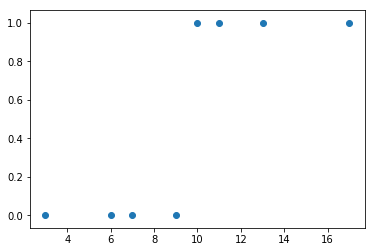

In [7]:
xx = np.array([3,6,7,9,10,11,13,17])
yy = np.array([0,0,0,0,1,1,1,1])

plt.scatter(xx, yy)
plt.show()

In [8]:
'''1) Prepare Data'''
# Reshape data as required by # Sklearn library
xx = np.reshape(xx,(8,1))
yy = yy

'''2) Define the Logistic Model from sklearn library'''
model = linear_model.LogisticRegression()

'''3) Fit the model using fit function'''
model.fit(xx, yy)

# And now we can print the model equation with model parameters 
print('Y = 1/(1+exp('+str(model.coef_[0][0])+ ' X + '+ '' + str(model.intercept_[0])+'))')

Y = 1/(1+exp(0.1479546966024959 X + -0.9036075307621111))


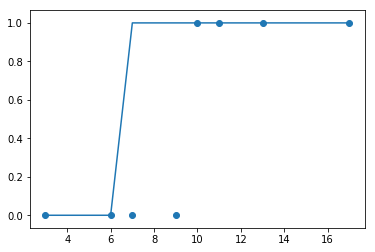

In [9]:
'''4) Prediction and Validation'''

# Prediction from the model using "predict" function
yy_pred = model.predict(xx)

# And let's plot ground truth data as a scatter plot and modeled equation as a line plot to visually validate the model
plt.scatter(xx, yy)
plt.plot(xx, yy_pred)
plt.show()

## 3) Linear Regression - Multiple Input Variables

Now, we can extent our models in to models with multiple input variables. In this case, we will use a dataset call "diabetes dataset" that available in sklearn library by default.

This dataset contains multi variable input data such as physiological parameters of patients with diabetes, such as age, weight, blood pressure, etc. And output data about level of disease progression after a year (like sugar level).

In [10]:
'''Loading the Dataset'''
xx, yy = datasets.load_diabetes(return_X_y=True)

print(xx.shape)
print(yy.shape)

(442, 10)
(442,)


In this case, we have data for 442 patients, 10 input variables and 1 output variable.

Similarly to our first example, we can create a linear model with this new dataset.

In [11]:
model = linear_model.LinearRegression()
model.fit(xx, yy)

# Since equation is complicated now with 10 variables, let's print all model parameters.
print(model.coef_) # 10 model parameters corresponding to each input variable
print(model.intercept_) # value of the intercept (constant) of the model

[1049.80488451 -244.2754229   524.41400778  308.90322792 -794.47357778
  468.21614222   92.82170616  176.00407763  744.62767327   54.13899966]
152.13348416289688


In [12]:
'''Prediction'''

yy_pred = model.predict(xx)

Since we have 10 input variables, we can't plot results with input data to validate our model because number of dimensions are too large to plot in a 2-Dimentional plot. So let's calculate Root Mean Squared Error as an error estimator.

And in next section, we will introduce dimension reduction technique to bring 10 dimensional input variables to 2 dimensional input variables. And then, we can plot and visualize our model prediction for us to validate visually.

In [13]:
'''Calculation of Root Mean Squared Error'''

rmse = np.sqrt(np.mean(np.square(yy_pred-yy)))
print(rmse)

73.07893934861306


## 4) PCA - Principle Component Analysis

In this example, we are going to use Principle Component Analysis (dimensionality reduction technique) to reduce 10 dimensional input variable to 2 dimensional input variable. And with that, we will be able to visualize model prediction in 2 dimensional plot to validate the model prediction.

There are lots of interesting mathematics under the hood. But in this case, we use PCA function in sklearn that encapsulate all those complex mathematics to perform dimension reduction

In [14]:
'''PCA '''

pca = decomposition.PCA(n_components=2) # define PCA with output dimensionality as 2
pca.fit(xx) # fitting PCA (similar to fitting in above examples)
xx_pca = pca.transform(xx) # transforming data / reducing dimension (similar to prediction in above examples)

print('Shape before PCA: ', xx.shape)
print('Shape after PCA: ', xx_pca.shape)

Shape before PCA:  (442, 10)
Shape after PCA:  (442, 2)


We have already transformed 10 dimensional input variables to 2 dimension, and now, we can plot them as 2-D scatter plot. Now our goal is to visually validate our model prediction verses actual values (blood sugar level in this example). So we can plot 2 scatter plots, and color the dots in 2 scatter plots by actual __*yy*__ values and predicted __*yy*__ values respectively. Then we can visually validate our model prediction with respect to actual blood pressure values.

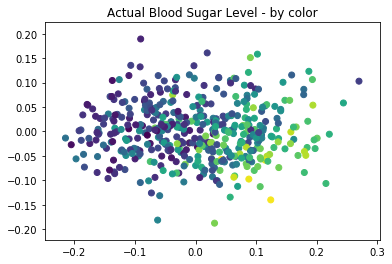

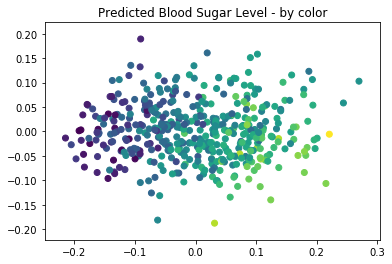

In [15]:
plt.scatter(xx_pca[:,0], xx_pca[:,1], c=yy) # c for color
plt.title('Actual Blood Sugar Level - by color')
plt.show()

plt.scatter(xx_pca[:,0], xx_pca[:,1], c=yy_pred) # c for color
plt.title('Predicted Blood Sugar Level - by color')
plt.show()

So in these 2 plots, we can see distribution of color is similar, concluding our model prediction is similar to actual blood sugar level values.

In summary, we can use PCA kind of dimensionality reduction techniques to visualize higher dimensional data in 2 dimensions. And there are many dimensionality reduction techniques are available with their own unique properties. One such another method is known as t-distributed stochastic neighbor embedding (t-SNE) which is becoming popular these days.